# 안녕하세요:)

## AIVLE 미니프로젝트 '서울시 생활정보 기반 대중교통 수요 분석 ' 과정에 오신 여러분을 환영합니다.
* 본 과정에서는 서울시 생활정보 데이터를 기반으로 데이터 분석을 시도하고 주어진 문제를 해결할 것입니다.
* 우리는 공공 데이터를 활용해 버스노선 관련 인사이트를 도출하여 유용한 정책을 세우는데 도움을 주고자 합니다

## 개인과제
* 데이터 구조, 분포 확인, 전처리 : 1.1_버스정류장데이터 / 1.2 유동인구데이터 / 1.3_주민등록데이터 / 1.4_업종등록데이터
* 데이터간 관계 가설 수립 및 검증 : 1.5_데이터 분석

## ▣ 우리가 풀어야 하는 문제는 무엇인가요?

* 제공 데이터
    - 구 별 유동인구 데이터
    - 구 별 주민 등록 데이터
    - 구 별 업종 등록 정보
    - 버스 승하차 및 운행 노선 데이터 

### 위 제공 데이터를 분석하여 버스 노선 추가 필요 대상 지역(구 단위)을 선정합니다

# 이 4개의 데이터들을 어떻게 합칠까요?

In [8]:
import pandas as pd

In [9]:
standard = pd.DataFrame({'도착 시군구 코드': [11010, 11020, 11030, 11040, 11050, 11060, 11070, 11080, 11090, 11100, 11110, 11120, 11130, 11140, 11150, 11160, 11170, 11180, 11190, 11200, 11210, 11220, 11230, 11240, 11250],
                         '자치구' :['종로구','중구','용산구','성동구','광진구','동대문구','중랑구','성북구','강북구','도봉구','노원구','은평구','서대문구','마포구','양천구','강서구','구로구','금천구','영등포구','동작구','관악구','서초구','강남구','송파구','강동구']})

In [3]:
standard

,도착 시군구 코드,자치구
0,11010,종로구
1,11020,중구
2,11030,용산구
3,11040,성동구
4,11050,광진구
5,11060,동대문구
6,11070,중랑구
7,11080,성북구
8,11090,강북구
9,11100,도봉구


In [10]:
# 버스 정류장 데이터 - df_seoul_bus_station
# 유동인구 데이터 - df_seoul_moving
# 구별 상권 데이터 - df_seoul_business
# 구별 등록 인구 데이터 - df_seoul_people

df_seoul_bus_station = pd.read_csv('df_seoul_bus_station.csv')
df_seoul_moving = pd.read_csv('df_seoul_moving.csv', encoding = 'UTF-8')
df_seoul_business = pd.read_csv('df_seoul_business.csv', index_col = 0, encoding = 'UTF-8')
df_seoul_people = pd.read_csv('df_seoul_people.csv', index_col = 0)

In [27]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
df_seoul_moving.head()

,도착 시군구 코드,총 이동 시간,총 이동 인구,평균 이동 시간(분),이동인구(합),자치구
0,11010,9356120,19385709.60,21.349599,44.235978,종로구
1,11020,9306020,19715322.61,21.012462,44.516072,중구
2,11030,8514380,14707082.87,21.364786,36.903883,용산구
3,11040,8887140,17449273.95,21.740324,42.685596,성동구
4,11050,8625540,17947278.99,22.474283,46.762548,광진구


In [11]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
df_seoul_moving['자치구'] = df_seoul_moving['도착 시군구 코드'].map({
    11010:'종로구',
    11020:'중구',
    11030:'용산구',
    11040:'성동구',
    11050:'광진구',
    11060:'동대문구',
    11070:'중랑구',
    11080:'성북구',
    11090:'강북구',
    11100:'도봉구',
    11110:'노원구',
    11120:'은평구',
    11130:'서대문구',
    11140:'마포구',
    11150:'양천구',
    11160:'강서구',
    11170:'구로구',
    11180:'금천구',
    11190:'영등포구',
    11200:'동작구',
    11210:'관악구',
    11220:'서초구',
    11230:'강남구',
    11240:'송파구',
    11250:'강동구'
})
df_seoul_moving.head()

,도착 시군구 코드,총 이동 시간,총 이동 인구,평균 이동 시간(분),이동인구(합),자치구
0,11010,9356120,19385709.60,21.349599,44.235978,종로구
1,11020,9306020,19715322.61,21.012462,44.516072,중구
2,11030,8514380,14707082.87,21.364786,36.903883,용산구
3,11040,8887140,17449273.95,21.740324,42.685596,성동구
4,11050,8625540,17947278.99,22.474283,46.762548,광진구


In [12]:
# 버스 정류장 데이터 - df_seoul_bus_station
# 유동인구 데이터 - df_seoul_moving
# 구별 상권 데이터 - df_seoul_business
# 구별 등록 인구 데이터 - df_seoul_people

df_1 = pd.merge(df_seoul_people, df_seoul_bus_station, how = 'inner', on = '자치구')
df_2 = pd.merge(df_seoul_business, df_seoul_moving, how = 'inner', on = '자치구')

seoul_bus = pd.merge(df_1, df_2, how = 'inner', on = '자치구')

In [73]:
seoul_bus.rename(columns= {
    '이동인구(합)' : '이동인구평균'
}, inplace = True)

In [84]:
seoul_bus.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 0 to 24
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   자치구          25 non-null     object 
 1   인구           25 non-null     int64  
 2   65세이상고령자     25 non-null     int64  
 3   일반승객         25 non-null     int64  
 4   정류장수         25 non-null     int64  
 5   노선수          25 non-null     int64  
 6   승차총승객수       25 non-null     int64  
 7   하차총승객수       25 non-null     int64  
 8   승차평균승객수      25 non-null     float64
 9   하차평균승객수      25 non-null     float64
 10  한식일반음식점      25 non-null     int64  
 11  커피전문점        25 non-null     int64  
 12  일반교과학원       25 non-null     int64  
 13  도착 시군구 코드    25 non-null     int64  
 14  총 이동 시간      25 non-null     int64  
 15  총 이동 인구      25 non-null     float64
 16  평균 이동 시간(분)  25 non-null     float64
 17  이동인구평균       25 non-null     float64
dtypes: float64(5), int64(12), object(1)
memory usage: 4.

---

## 1.가설 수립 
+ 어떤 데이터를 label 데이터로 하실 건가요?

? 정해진게 없나요? - 네 라벨을 개인및 조별로 고민하셔서 라벨데이터를 설정하시면 되겠습니다
? 가설마다 라벨데이터가 달라도 상관없나요? 네 그렇습니다
? 가설은 3개만 해야하나요? 그 이상 하셔도 무방합니다

### 가설을 설정해 봅시다 (인당 최소 3개) - 미니프로젝트 진행의 편의상 가설은 이변량 분석을 염두에 두고 설정해 주세요

* 가설 1 : 일반 승객 및 65세 이상 고령자와 승하차 승객수는 관계가 없다.

* 가설 2 : 승하차 승객수와 사업체는 관계가 없다.

* 가설 3 : 승하차승객수와 버스정류장수, 노선수는 관계가 없다.

## 2.단변량 분석

+ 변수의 비즈니스 의미  

+ 숫자? 범주?  

+ 전처리 사항
   - NaN 존재 여부 및 조치 방안  
   - 가변수화 대상여부  
   
+ 기초통계량

+ 분포  

+ 위 정보로부터 파악한 내용(비즈니스!) 정리  

+ 추가 분석해볼 사항 도출

In [16]:
# 시각화 한글폰트 설정
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')

노선 평균 :  72.92
노선 최댓값 :  107
노선 최솟값 :  21


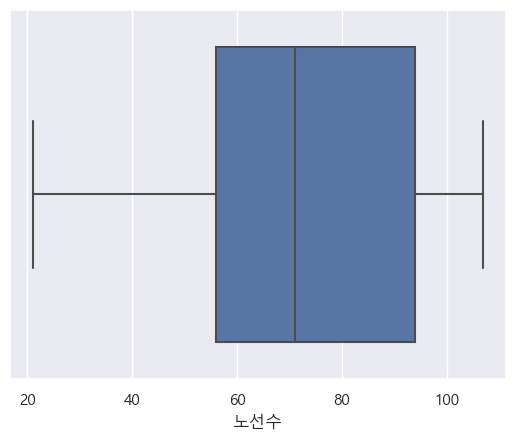

In [102]:
print(f"노선 평균 : ", seoul_bus['노선수'].mean())
print(f"노선 최댓값 : ", seoul_bus['노선수'].max())
print(f"노선 최솟값 : ", seoul_bus['노선수'].min())
sns.boxplot(x = '노선수', data = seoul_bus)
plt.show()


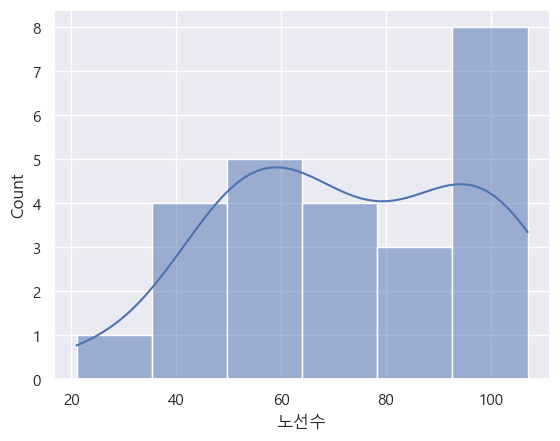

In [103]:
sns.histplot(x= '노선수', data = seoul_bus, kde = True)
plt.show()

정류장 평균 :  424.6
정류장 최댓값 :  602
정류장 최솟값 :  178


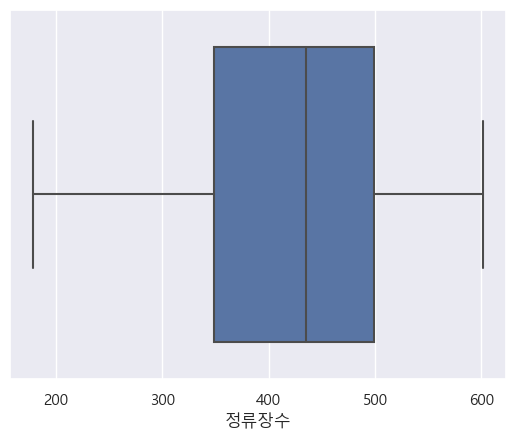

In [106]:
print(f"정류장 평균 : ", seoul_bus['정류장수'].mean())
print(f"정류장 최댓값 : ", seoul_bus['정류장수'].max())
print(f"정류장 최솟값 : ", seoul_bus['정류장수'].min())
sns.boxplot(x = '정류장수', data = seoul_bus)
plt.show()

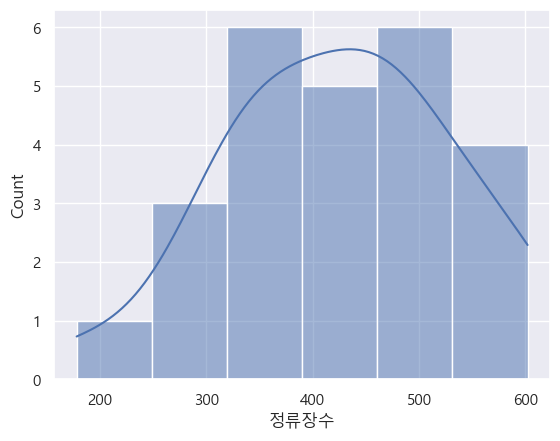

In [107]:
sns.histplot(x= '정류장수', data = seoul_bus, kde = True)
plt.show()

## 3.이변량 분석

* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)를 수행하고 결과를 평가합니다.

* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 유의수준 : 5%
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.


In [14]:
import scipy.stats as spst

# 노선수와 상관계수
for col in seoul_bus.columns[1:] :
    print(f"{col} : ".ljust(15), spst.pearsonr(seoul_bus[col],seoul_bus['노선수']))
    
print("-"*120)

for col in seoul_bus.columns[1:] :
    print(f"{col} : ".ljust(15), spst.pearsonr(seoul_bus[col],seoul_bus['정류장수']))

인구 :            PearsonRResult(statistic=-0.28153592742780986, pvalue=0.1727635564288845)
65세이상고령자 :      PearsonRResult(statistic=-0.33429705643947205, pvalue=0.10240696545589698)
일반승객 :          PearsonRResult(statistic=-0.2692348850005273, pvalue=0.19310683865726402)
정류장수 :          PearsonRResult(statistic=0.25879843303095595, pvalue=0.2116069696436893)
노선수 :           PearsonRResult(statistic=0.9999999999999999, pvalue=1.5864253030664577e-181)
승차총승객수 :        PearsonRResult(statistic=0.6654877832095702, pvalue=0.0002830862285771981)
하차총승객수 :        PearsonRResult(statistic=0.6526422720355217, pvalue=0.00040610118937178525)
승차평균승객수 :       PearsonRResult(statistic=0.4935407909274122, pvalue=0.012170019218131729)
하차평균승객수 :       PearsonRResult(statistic=0.4704401254149345, pvalue=0.017632441540646464)
한식일반음식점 :       PearsonRResult(statistic=0.4047476348335748, pvalue=0.04475499749536905)
커피전문점 :         PearsonRResult(statistic=0.39527392470061734, pvalue=0.05050405934174307)
일반교과학

사업체수 평균 :  2295.64
사업체수 최댓값 :  5465
사업체수 최솟값 :  1311


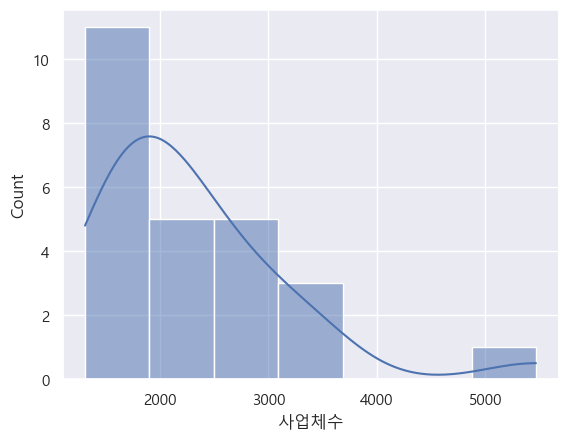

인구 :            PearsonRResult(statistic=0.4228041272228451, pvalue=0.035230987639434615)
65세이상고령자 :      PearsonRResult(statistic=0.2226440355117748, pvalue=0.2847422576815313)
일반승객 :          PearsonRResult(statistic=0.45425141552988585, pvalue=0.02254301673986288)
정류장수 :          PearsonRResult(statistic=0.2906653868060458, pvalue=0.15866647337745549)
노선수 :           PearsonRResult(statistic=0.2666297984427266, pvalue=0.19761713407588435)
승차총승객수 :        PearsonRResult(statistic=0.5664202553031442, pvalue=0.0031589453723678633)
하차총승객수 :        PearsonRResult(statistic=0.5356079278470778, pvalue=0.005792101284188273)
승차평균승객수 :       PearsonRResult(statistic=0.07739132941348223, pvalue=0.713098316119783)
하차평균승객수 :       PearsonRResult(statistic=0.04673647323021757, pvalue=0.8244387809257674)
한식일반음식점 :       PearsonRResult(statistic=0.9062259776356075, pvalue=4.5327984150836423e-10)
커피전문점 :         PearsonRResult(statistic=0.9119165302079121, pvalue=2.2705191880506704e-10)
일반교과학원 :    

In [130]:
seoul_copy = seoul_bus.copy()
seoul_copy['사업체수'] = seoul_copy['한식일반음식점'] + seoul_copy['커피전문점'] + seoul_copy['일반교과학원']

print(f"사업체수 평균 : ", seoul_copy['사업체수'].mean())
print(f"사업체수 최댓값 : ", seoul_copy['사업체수'].max())
print(f"사업체수 최솟값 : ", seoul_copy['사업체수'].min())
sns.histplot(x = '사업체수', data = seoul_copy, kde=True)
plt.show()

for col in seoul_copy.columns[1:] :
    print(f"{col} : ".ljust(15), spst.pearsonr(seoul_copy[col],seoul_copy['사업체수']))

In [ ]:
plt.scatter(seoul_bus('65'))

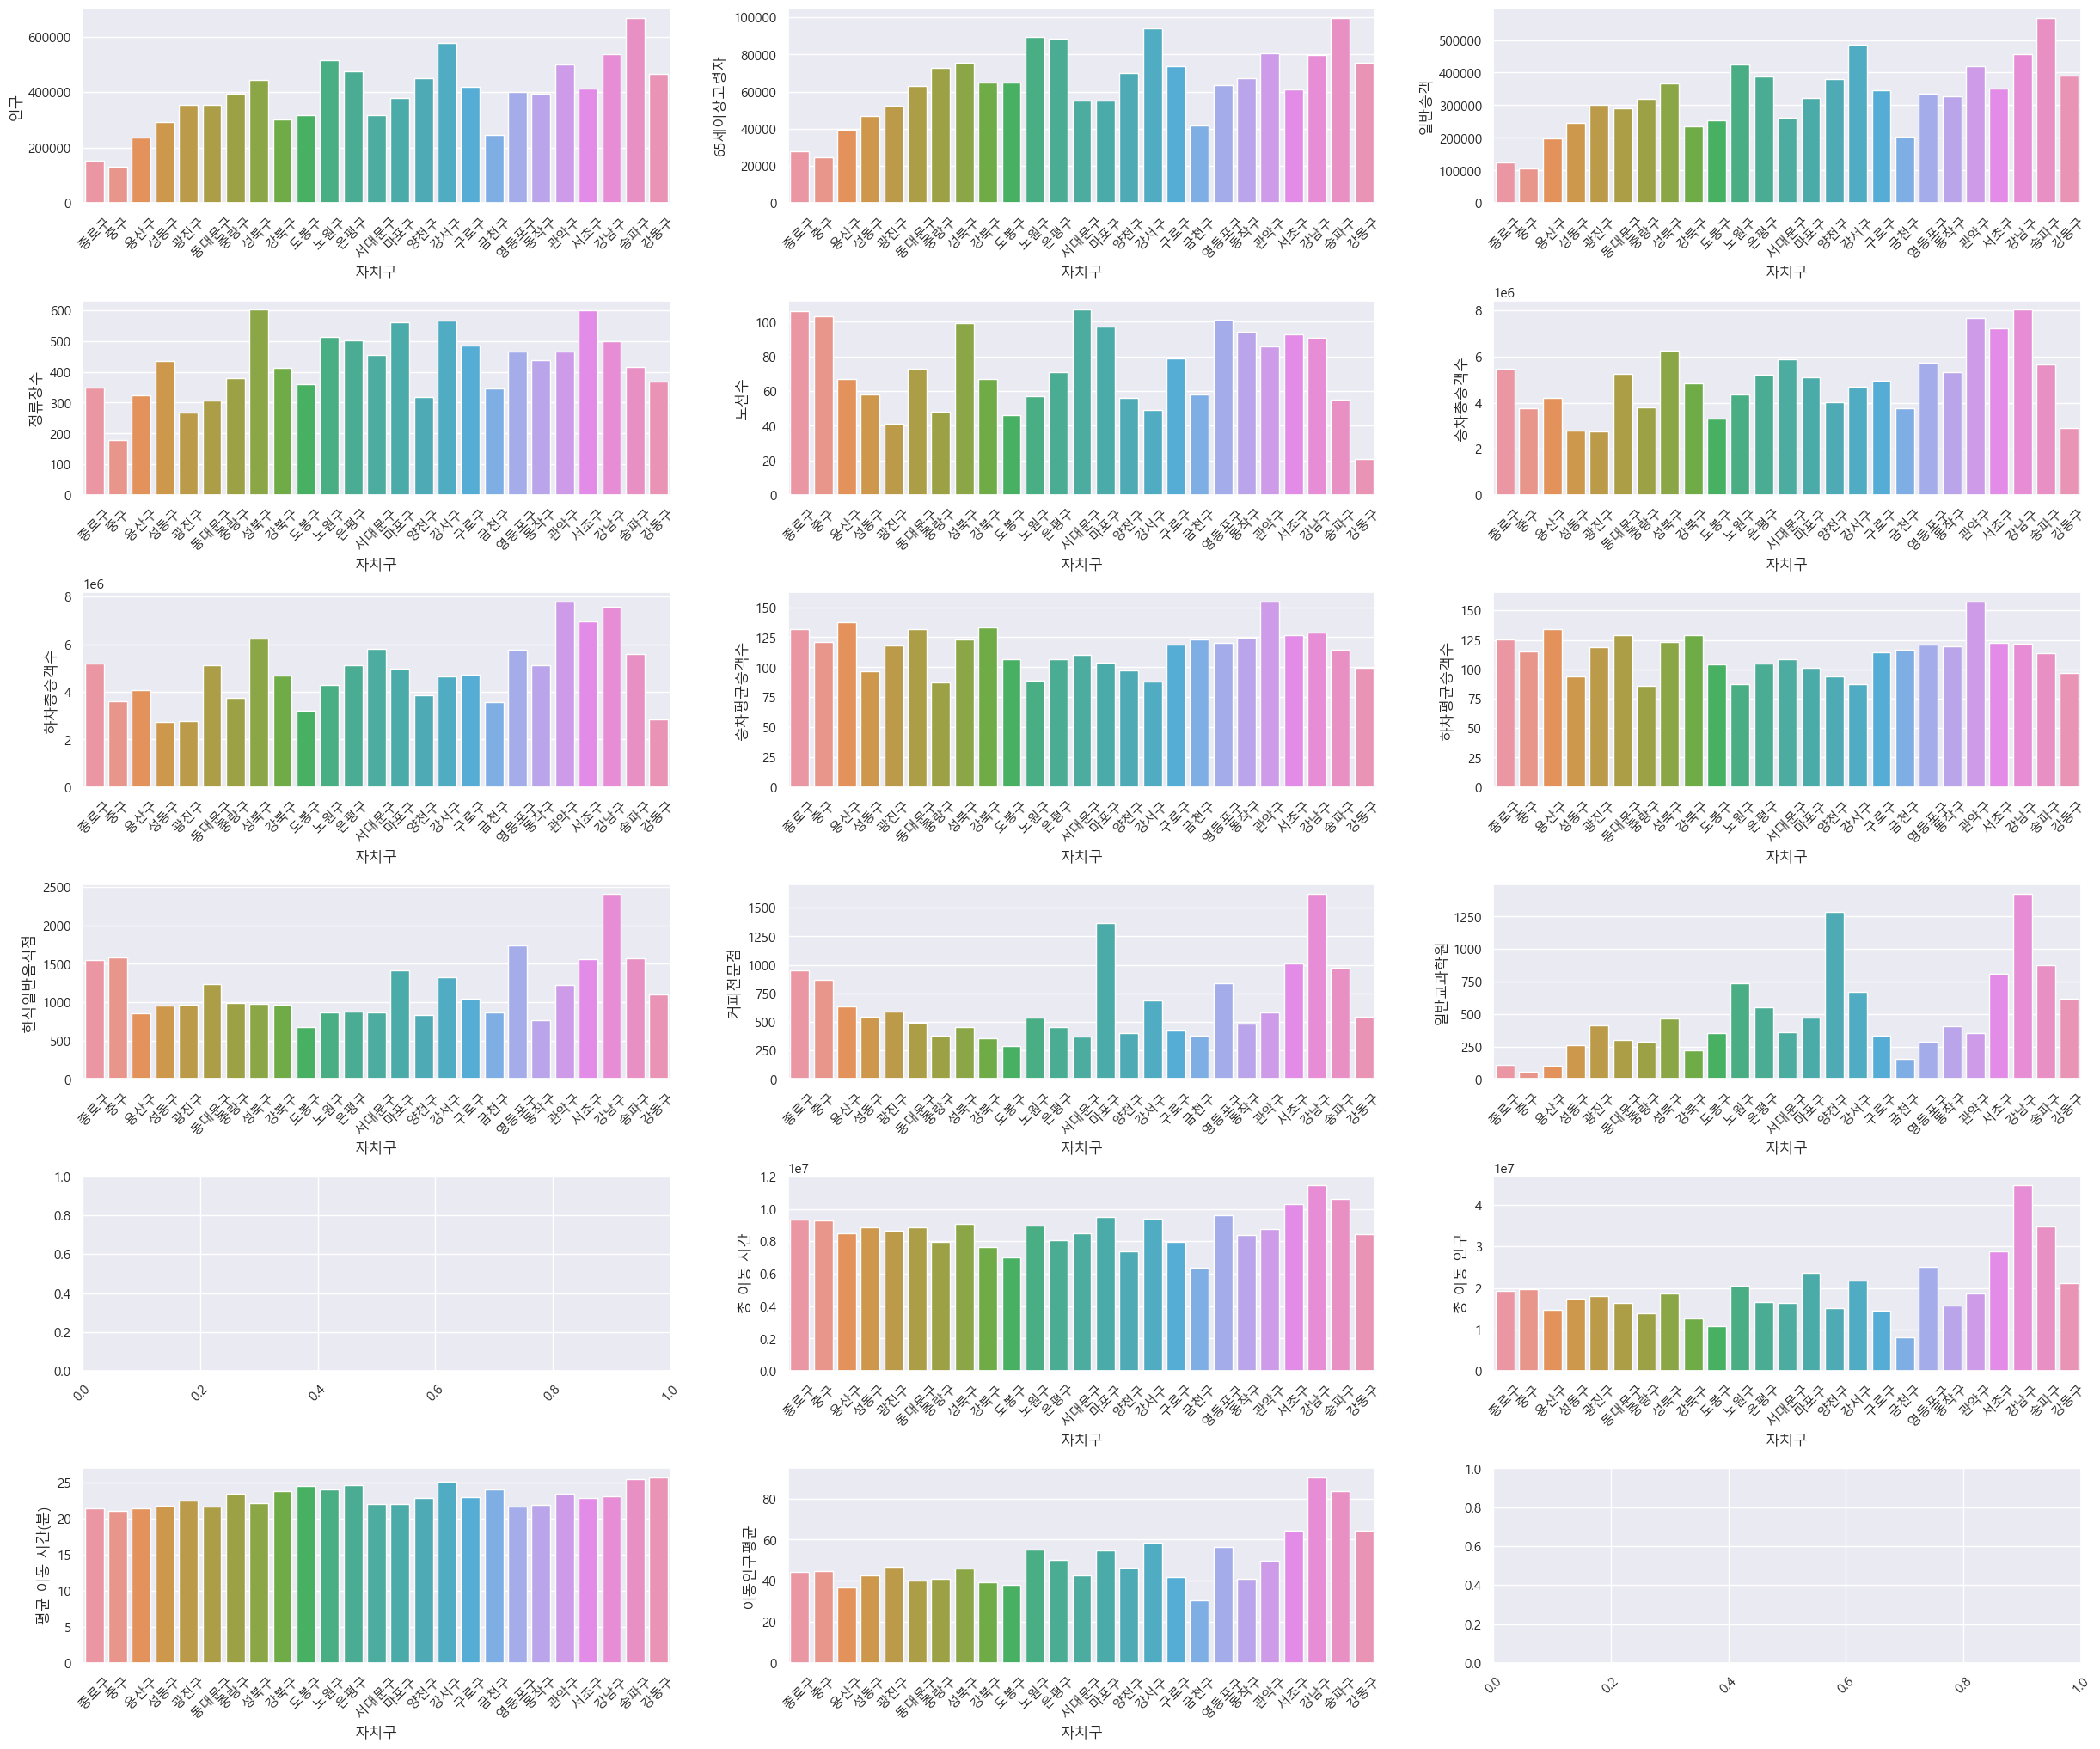

In [75]:
fig, axs = plt.subplots(6,3, figsize = (30,25))
for ax in axs.flatten():
    for label in ax.get_xticklabels():
        label.set_rotation(45)
        
for i,col in enumerate(seoul_bus) :
    if col in ['자치구', '도착 시군구 코드'] :
        continue
        
    sns.barplot(x = '자치구', y = col, data = seoul_bus, ax = axs[(i-1)//3,(i-1)%3])
    
    
plt.subplots_adjust(hspace = 0.5)
plt.show()

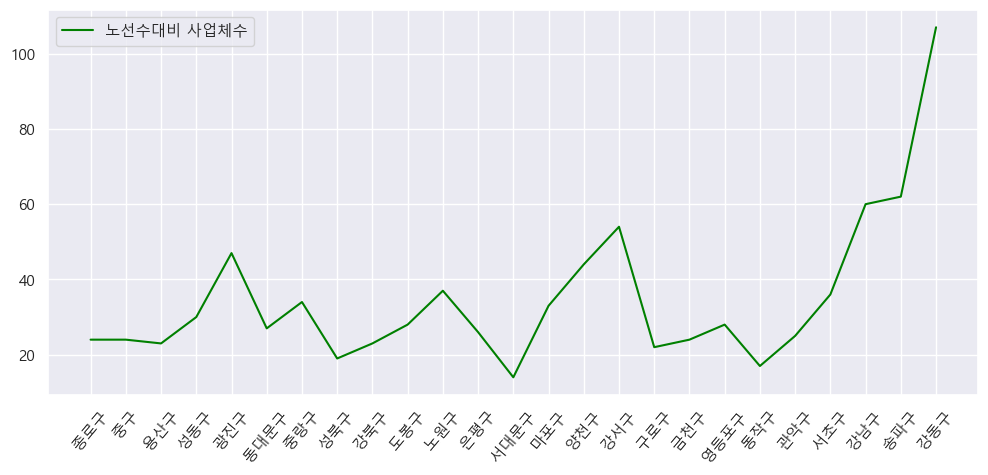

In [119]:
seoul_bus_copy = seoul_bus.copy()
seoul_bus_copy['사업체수'] = seoul_bus_copy['한식일반음식점'] + seoul_bus_copy['커피전문점'] + seoul_bus_copy['일반교과학원']
seoul_bus_copy['노선수대비 사업체수'] = seoul_bus_copy['사업체수'] // seoul_bus_copy['노선수']

plt.figure(figsize = (12,5))
# plt.plot('자치구', '한식일반음식점', data = seoul_bus_copy)
# plt.plot('자치구', '커피전문점', data = seoul_bus_copy)
# plt.plot('자치구', '일반교과학원', data = seoul_bus_copy)
# plt.plot('자치구', '사업체수', data = seoul_bus_copy)

plt.plot('자치구', '노선수대비 사업체수', data = seoul_bus_copy, color = 'green')

plt.legend()
plt.xticks(rotation = 50)
plt.show()

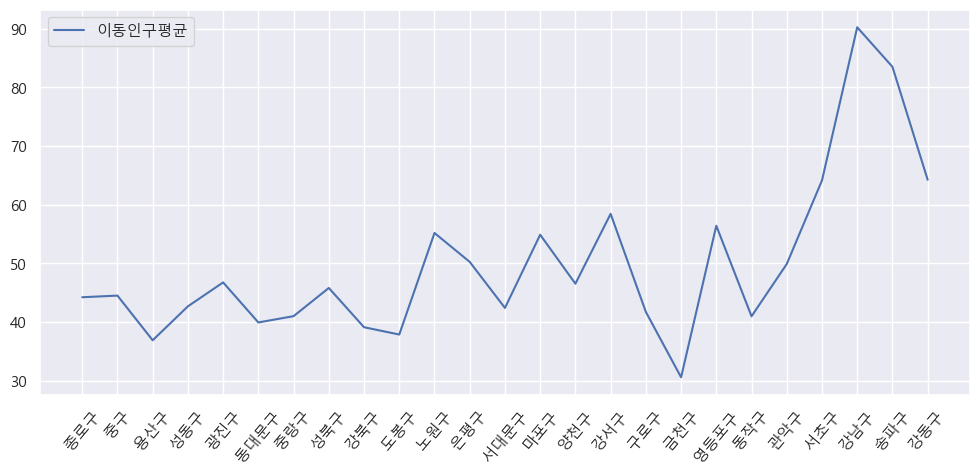

In [78]:
seoul_bus_copy = seoul_bus.copy()

plt.figure(figsize = (12,5))
plt.plot('자치구', '이동인구평균', data = seoul_bus_copy)

plt.legend()
plt.xticks(rotation = 50)
plt.show()

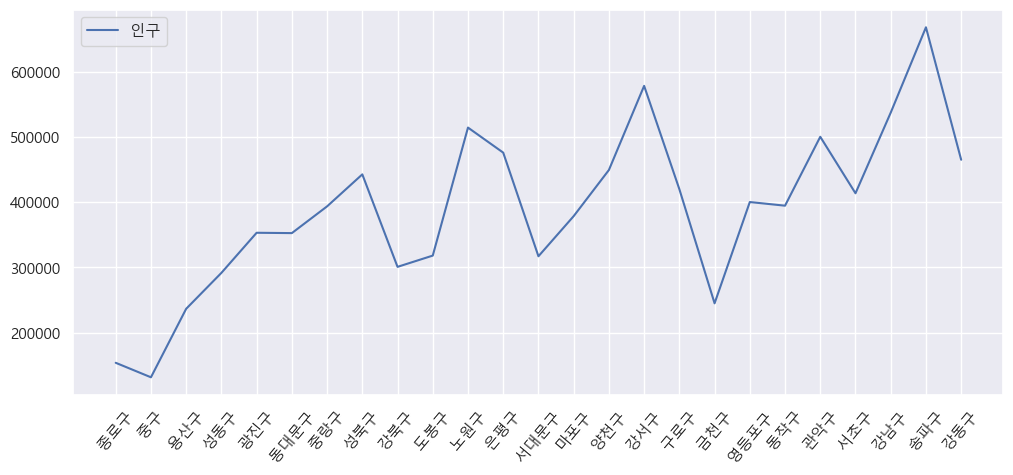

In [82]:
seoul_bus_copy = seoul_bus.copy()

plt.figure(figsize = (12,5))
plt.plot('자치구', '인구', data = seoul_bus_copy)

plt.legend()
plt.xticks(rotation = 50)
plt.show()

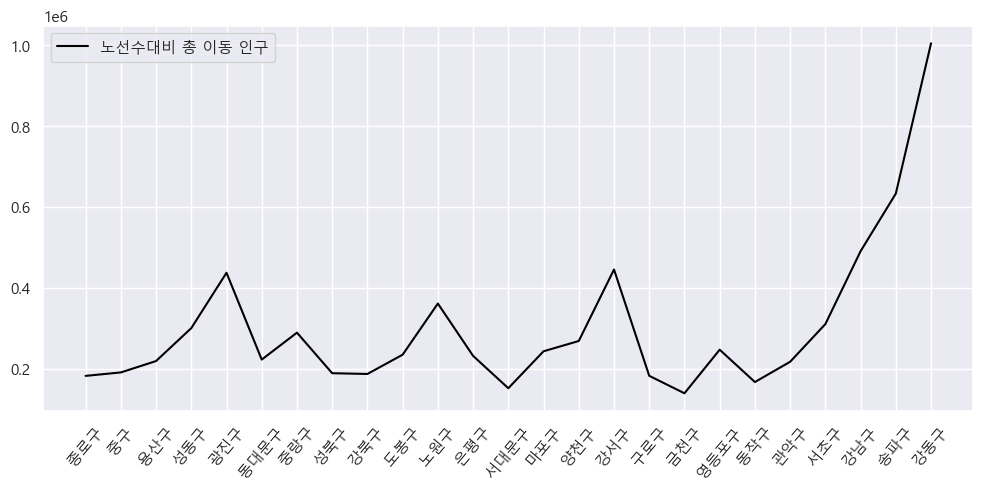

In [90]:
seoul_bus_copy = seoul_bus.copy()
seoul_bus_copy['노선수대비 총 이동 인구'] = seoul_bus_copy['총 이동 인구'] // seoul_bus_copy['노선수']

plt.figure(figsize = (12,5))
plt.plot('자치구', '노선수대비 총 이동 인구', data = seoul_bus_copy, color = 'black')

plt.legend()
plt.xticks(rotation = 50)
plt.show()

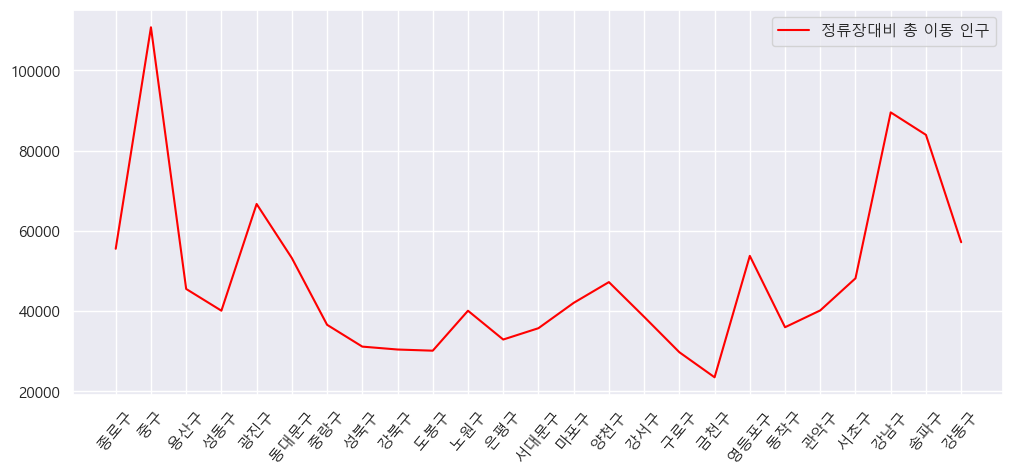

In [89]:
seoul_bus_copy = seoul_bus.copy()
seoul_bus_copy['정류장대비 총 이동 인구'] = seoul_bus_copy['총 이동 인구'] // seoul_bus_copy['정류장수']

plt.figure(figsize = (12,5))
plt.plot('자치구', '정류장대비 총 이동 인구', data = seoul_bus_copy, color = 'red')

plt.legend()
plt.xticks(rotation = 50)
plt.show()

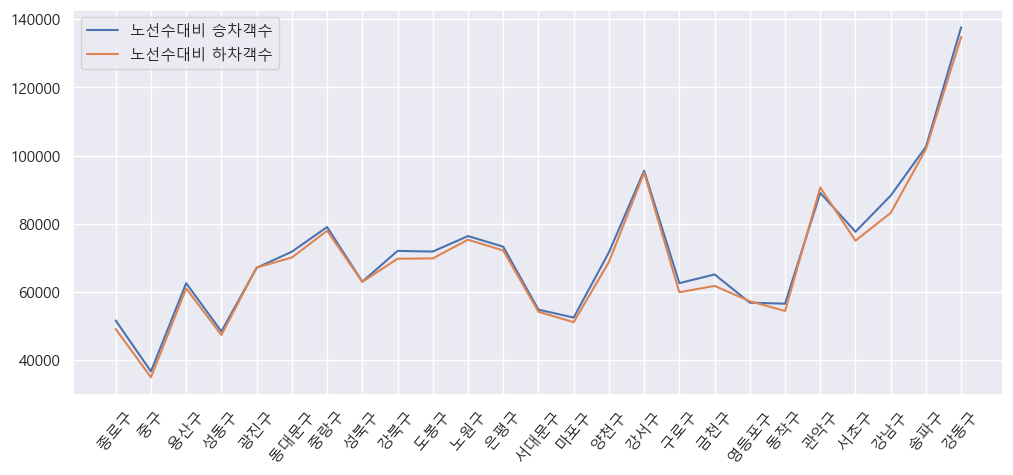

In [129]:
seoul_bus_copy = seoul_bus.copy()
seoul_bus_copy['노선수대비 승차객수'] = seoul_bus_copy['승차총승객수'] // seoul_bus_copy['노선수']
seoul_bus_copy['노선수대비 하차객수'] = seoul_bus_copy['하차총승객수'] // seoul_bus_copy['노선수']

plt.figure(figsize = (12,5))
plt.plot('자치구', '노선수대비 승차객수', data = seoul_bus_copy)
plt.plot('자치구', '노선수대비 하차객수', data = seoul_bus_copy)

plt.legend()
plt.xticks(rotation = 50)
plt.show()

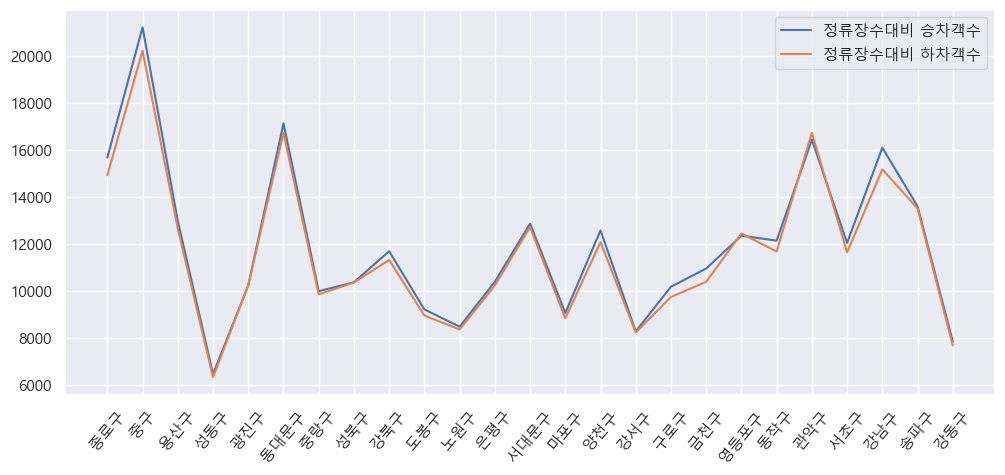

In [130]:
seoul_bus_copy = seoul_bus.copy()
seoul_bus_copy['정류장수대비 승차객수'] = seoul_bus_copy['승차총승객수'] // seoul_bus_copy['정류장수']
seoul_bus_copy['정류장수대비 하차객수'] = seoul_bus_copy['하차총승객수'] // seoul_bus_copy['정류장수']

plt.figure(figsize = (12,5))
plt.plot('자치구', '정류장수대비 승차객수', data = seoul_bus_copy)
plt.plot('자치구', '정류장수대비 하차객수', data = seoul_bus_copy)

plt.legend()
plt.xticks(rotation = 50)
plt.show()

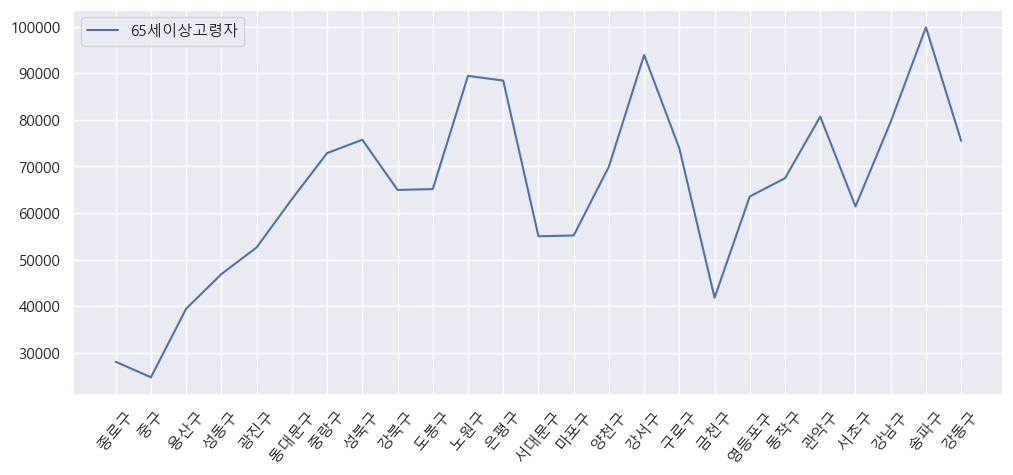

In [19]:
seoul_bus_copy = seoul_bus.copy()

plt.figure(figsize = (12,5))
plt.plot('자치구', '65세이상고령자', data = seoul_bus_copy)

plt.legend()
plt.xticks(rotation = 50)
plt.show()

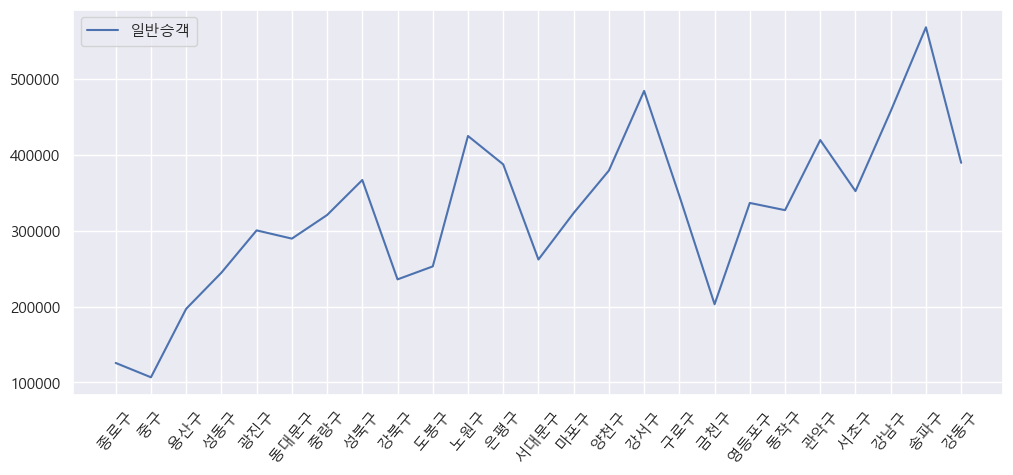

In [20]:
seoul_bus_copy = seoul_bus.copy()

plt.figure(figsize = (12,5))
plt.plot('자치구', '일반승객', data = seoul_bus_copy)

plt.legend()
plt.xticks(rotation = 50)
plt.show()

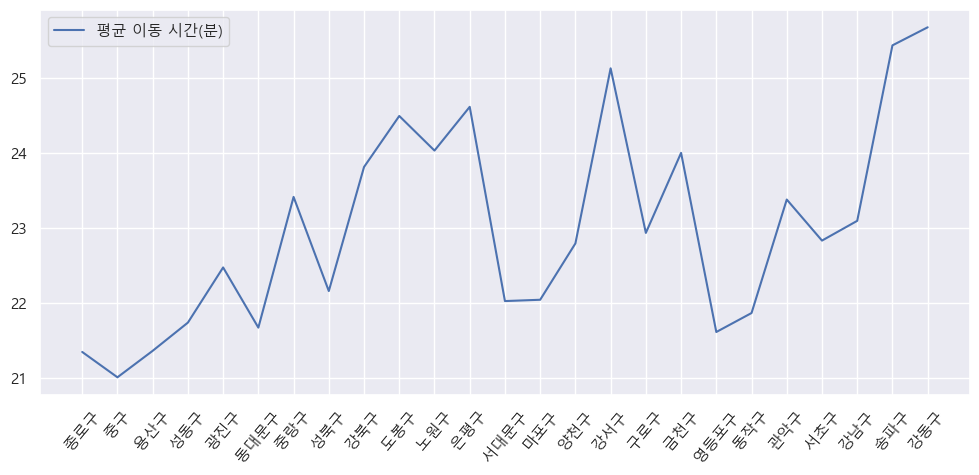

In [26]:
seoul_bus_copy = seoul_bus.copy()

plt.figure(figsize = (12,5))
plt.plot('자치구', '평균 이동 시간(분)', data = seoul_bus_copy)

plt.legend()
plt.xticks(rotation = 50)
plt.show()

In [136]:
seoul_bus_copy = seoul_bus.copy()
seoul_bus_target = seoul_bus_copy['노선수']
seoul_bus_input = seoul_bus_copy
for remove_col in ['자치구', '도착 시군구 코드', '노선수'] :
    seoul_bus_input.drop(remove_col, axis = 1, inplace = True)

In [138]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(seoul_bus_input, seoul_bus_target, random_state = 42)

In [141]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()
knr.fit(train_input, train_target)

KNeighborsRegressor()

In [151]:
seoul_bus_input.loc[seoul_bus_input.index == 24]

,인구,남자,여자,정류장수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,한식일반음식점,커피전문점,일반교과학원,총 이동 시간,총 이동 인구,평균 이동 시간(분),이동인구(합)
24,465097,227891,237206,369,2890053,2830506,99.161194,97.118065,1101,546,620,8430800,21101460.33,25.670084,64.249687


In [149]:
knr.predict(seoul_bus_input.loc[seoul_bus_input.index == 24])

array([54.2])

In [150]:
seoul_bus.loc[seoul_bus.index == 24]

,자치구,인구,남자,여자,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,한식일반음식점,커피전문점,일반교과학원,도착 시군구 코드,총 이동 시간,총 이동 인구,평균 이동 시간(분),이동인구(합)
24,강동구,465097,227891,237206,369,21,2890053,2830506,99.161194,97.118065,1101,546,620,11250,8430800,21101460.33,25.670084,64.249687


### 1) 일반 승객 및 65세 이상 고령자와 승하차 승객수는 관계가 없다.

65세 미만 승객과 승하차승객수 : r = 0.3846  pvalue = 0.0575
65세 이상 고령자와 승하차승객수 r = 0.3092  pvalue = 0.1325

p-value 값이

### 2) 승하차 승객수와 사업체는 관계가 없다.

상관계수의 값도 둘다 0.5이상, p-value의 값이 0.05보다 매우 작기때문에 해당 대립가설이 증명되었다고 판단

사업체수 상관분석 / 승차총승객수 :  PearsonRResult(statistic=0.5664202553031442, pvalue=0.0031589453723678633)
사업체수 상관분석 / 하차총승객수 :  PearsonRResult(statistic=0.5356079278470778, pvalue=0.005792101284188273)



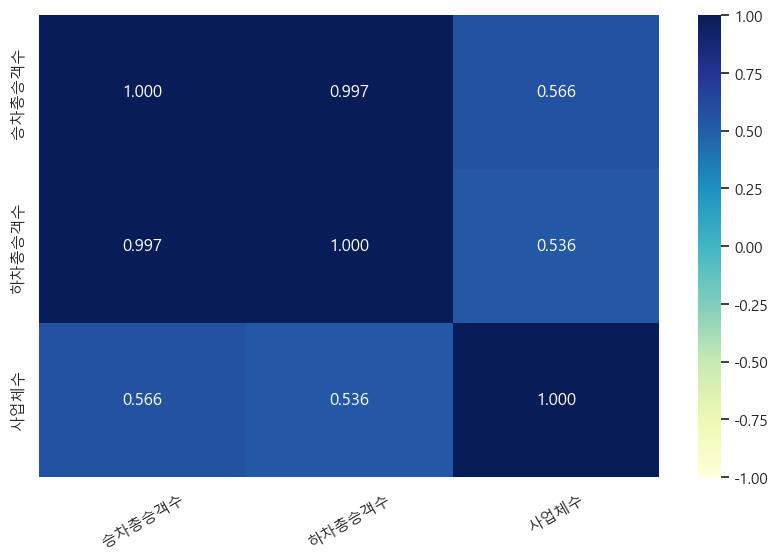

In [135]:
seoul_copy = seoul_bus.copy()
seoul_copy['사업체수'] = seoul_copy['한식일반음식점'] + seoul_copy['커피전문점'] + seoul_copy['일반교과학원']
seoul_copy = seoul_copy[['승차총승객수','하차총승객수','사업체수']]



for col in seoul_copy.columns :
    if col == '사업체수' : continue
    print(f"사업체수 상관분석 / {col} : ".ljust(15), spst.pearsonr(seoul_copy[col],seoul_copy['사업체수']))

print()

plt.figure(figsize = (10, 6))
sns.heatmap(seoul_copy.corr(), 
            annot = True,            # 숫자(상관계수) 표기 여부
            fmt = '.3f',             # 숫자 포멧 : 소수점 3자리까지 표기
            cmap = 'YlGnBu',       # 칼라맵
            vmin = -1, vmax = 1)     # 값의 최소, 최대값값
plt.xticks(rotation = 30)
plt.show()

### 3) 승하차승객수와 버스정류장수, 노선수는 관계가 없다.

p-value값이 0.05보다 매우 작기 때문에 해당 귀무가설을 기각, 높은 상관계수 값으로 노선과 평균 이동시간은 관련이 있다고 판단

정류장과 상관분석 / 승차총승객수 :  PearsonRResult(statistic=0.5666813370974585, pvalue=0.003141977397117322)
정류장과 상관분석 / 하차총승객수 :  PearsonRResult(statistic=0.5784790149467576, pvalue=0.0024518332034538645)
정류장과 상관분석 / 노선수 :  PearsonRResult(statistic=0.25879843303095595, pvalue=0.2116069696436893)

노선수와 상관분석 / 승차총승객수 :  PearsonRResult(statistic=0.6654877832095702, pvalue=0.0002830862285771981)
노선수와 상관분석 / 하차총승객수 :  PearsonRResult(statistic=0.6526422720355217, pvalue=0.00040610118937178525)
노선수와 상관분석 / 정류장수 :  PearsonRResult(statistic=0.25879843303095595, pvalue=0.2116069696436893)



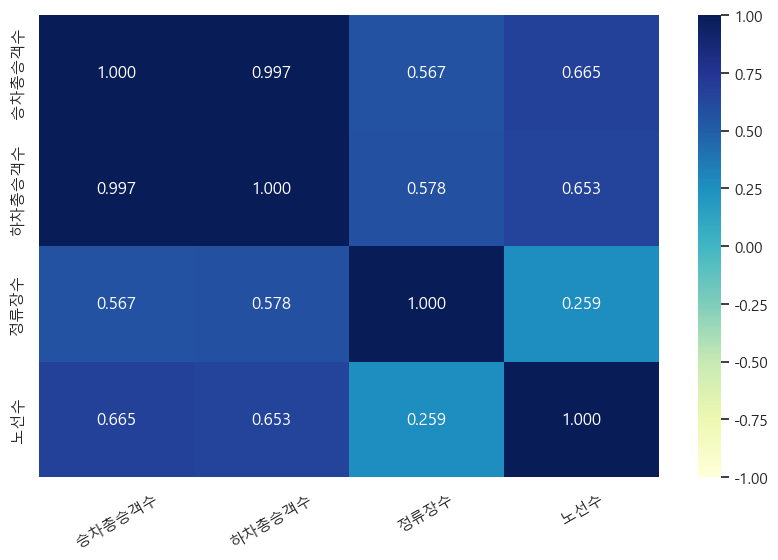

In [136]:
seoul_bus_2 = seoul_bus.copy()
seoul_bus_2 = seoul_bus[['승차총승객수','하차총승객수','정류장수','노선수']]

for col in seoul_bus_2.columns :
    if col == '정류장수' : continue
    print(f"정류장과 상관분석 / {col} : ".ljust(15), spst.pearsonr(seoul_bus[col],seoul_bus['정류장수']))

print()
    
for col in seoul_bus_2.columns :
    if col == '노선수' : continue
    print(f"노선수와 상관분석 / {col} : ".ljust(15), spst.pearsonr(seoul_bus[col],seoul_bus['노선수']))
    
print()

plt.figure(figsize = (10, 6))
sns.heatmap(seoul_bus_2.corr(), 
            annot = True,            # 숫자(상관계수) 표기 여부
            fmt = '.3f',             # 숫자 포멧 : 소수점 3자리까지 표기
            cmap = 'YlGnBu',       # 칼라맵
            vmin = -1, vmax = 1)     # 값의 최소, 최대값값
plt.xticks(rotation = 30)
plt.show()


### 상관계수를 구하고 HeatMap으로 시각화 후 나름의 분석을 해보세요.



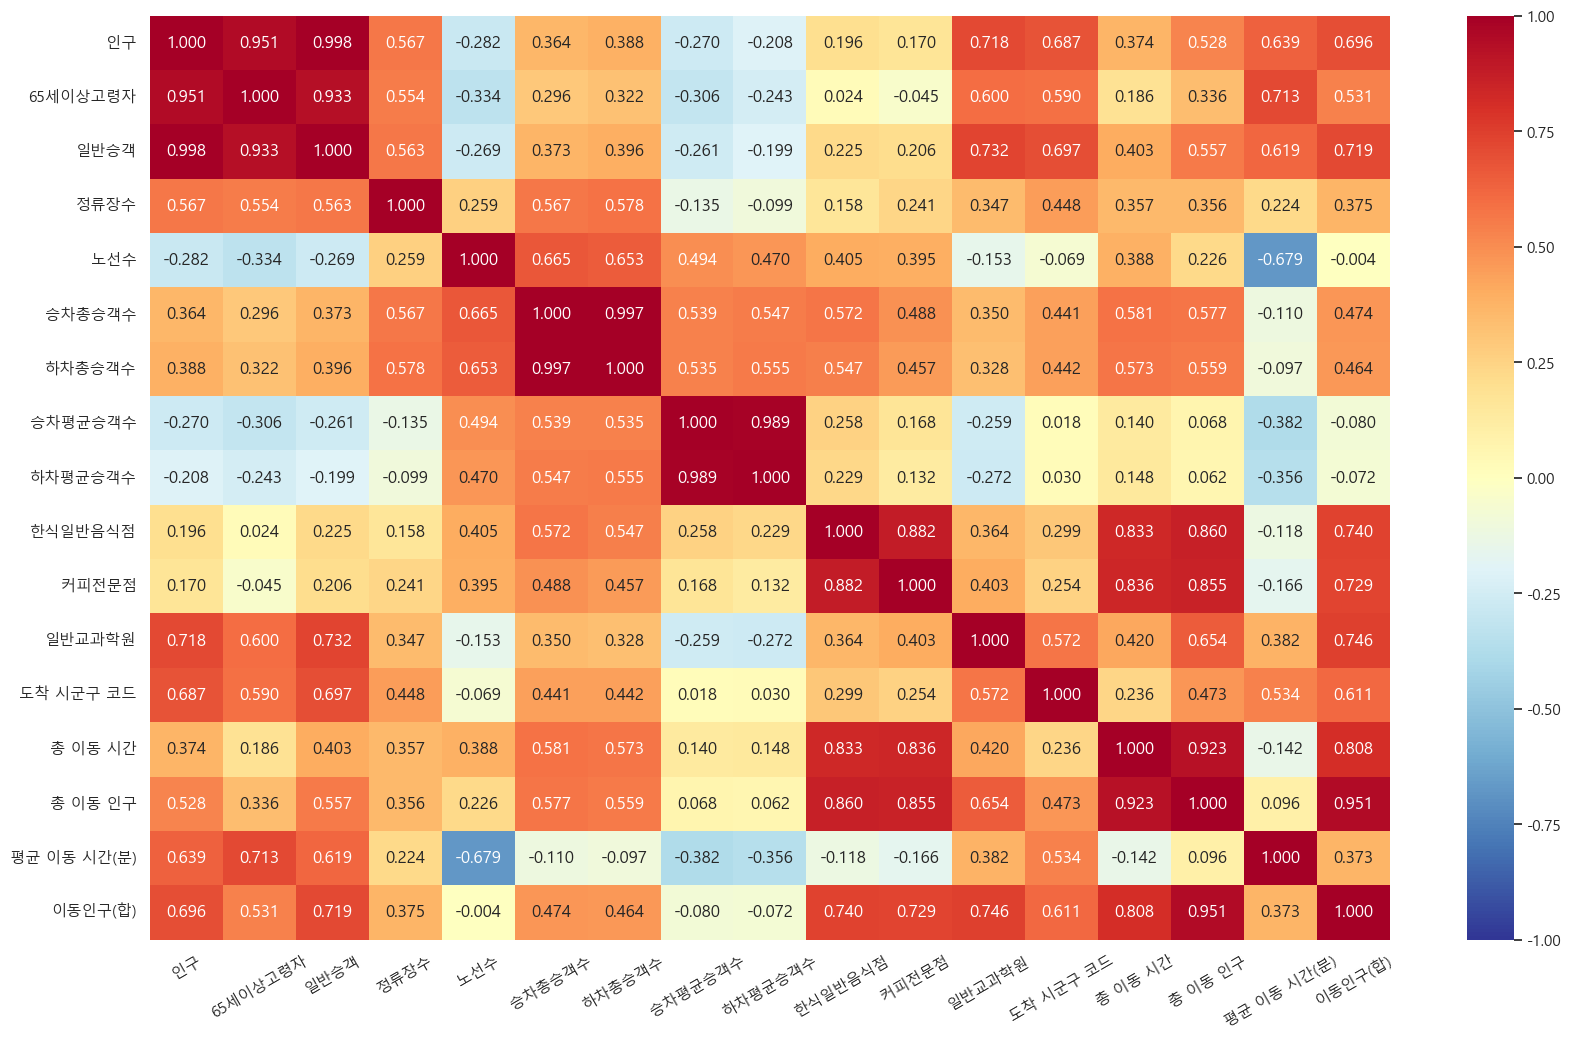

In [18]:
# 아래에 실습코드를 작성하고 상관계수를 확인 및 시각화 합니다.

plt.figure(figsize = (20, 12))
sns.heatmap(seoul_bus.corr(), 
            annot = True,            # 숫자(상관계수) 표기 여부
            fmt = '.3f',             # 숫자 포멧 : 소수점 3자리까지 표기
            cmap = 'RdYlBu_r',       # 칼라맵
            vmin = -1, vmax = 1)     # 값의 최소, 최대값값
plt.xticks(rotation = 30)
plt.show()

In [22]:
spst.pearsonr(seoul_bus['65세이상고령자'],seoul_bus['평균 이동 시간(분)'])

PearsonRResult(statistic=0.7127310428386966, pvalue=6.392011018849026e-05)

In [ ]:
# 위 차트를 통해 알게된 사실을 정리해봅시다.
# 1. 
# 2.
# 3.

## 4.관계 정리

### 1) 강한 관계의 변수

노선 : 승차 총 승객수(+ 평균), 하차 총 승객수(+ 평균), 평균 이동 시간(분) <br/>
정류장 : 승차 총 승객수(+ 평균), 하차 총 승객수(+ 평균), 인구

## 5.솔루션 도출

### 어느 구에 버스 노선 또는 정류장이 제일 필요한가요? 그 이유는?

노선 수 대비 승하차 승객, 정류장 대비 승하차 승객, 사업체(한식 + 교과 + 커피전문점)을 전체적으로 순위를 분석한 결과 "강남구, 송파구"는 노선과 정류장이 추가로 필요, 사업체는 비교적 적지만 노선 수 대비 승하차 승객 비율이 가장 높은 강동구, 강서구에는 노선 추가가 필요해보인다.